# Example of accessing raw data at CCIN2P3


- work with Weakly_2022_09
- use jupyter kernel LSST



- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/03/10



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/atmospec 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_09/conda/envs/lsst-scipipe-2.0.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/rapid_analysis 	setup


In [2]:
! echo $IMAGE_DESCRIPTION
! eups list -s lsst_distrib


   g64fc59b30a+e1dba0a6f6 	w_latest w_2022_09 current setup


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [4]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [5]:
import lsst.daf.butler as dafButler

In [6]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [108]:
#from lsst.rapid.analysis.nightReport import NightReporter
#dayObs = 20210707
#reporter = NightReporter('/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data', dayObs)

In [38]:
NightReporter?

Init signature: NightReporter(repoDir, dayObs, deferLoadingData=False)
Docstring:      <no docstring>
File:           /sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/rapid_analysis/python/lsst/rapid/analysis/nightReport.py
Type:           type
Subclasses:     


In [7]:
for c in sorted(registry.queryCollections()):
    print(c)

LATISS/calib
LATISS/calib/DM-28636
LATISS/calib/DM-28636/curated/19700101T000000Z
LATISS/calib/DM-28636/curated/20180101T000000Z
LATISS/calib/DM-28636/unbounded
LATISS/calib/DM-33875
LATISS/raw/all
refcats
u/calib/DM-32209-20211013a-felh
u/calib/DM-32209-20211013a-g
u/czw/DM-28920/biasGen.20210702a/20210702T215049Z
u/czw/DM-28920/calib/bias.20210720
u/czw/DM-28920/calib/dark.20210720a
u/czw/DM-28920/calib/defect.20210720a
u/czw/DM-28920/calib/flat.20210720
u/czw/DM-28920/darkGen.20210707d/20210707T215331Z
u/czw/DM-28920/defectGen.20210720a/20210720T230634Z
u/czw/DM-28920/flatGen.20210720Xa/20210720T223935Z
u/czw/DM-28920/flatGen.20210720Xb/20210720T225330Z
u/czw/DM-32209/flatGen.20211013a-felh/20211013T214128Z
u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z
u/dagoret/first_test
u/dagoret/first_test/20220310T164740Z
u/edennihy/DM-33875/flatGen.20220303a-SDSSi/20220303T213603Z
u/edennihy/DM-33875/flatGen.20220303b-SDSSr/20220303T194524Z


In [51]:
for x in sorted(registry.queryDatasetTypes()):
    print("-----------------------------------------------------------------------------")
    print(x)
    print("type is calibration : ",x.to_simple().isCalibration)

-----------------------------------------------------------------------------
DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit_system, visit}, StructuredDataDict)
type is calibration :  False
-----------------------------------------------------------------------------
DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
type is calibration :  True
-----------------------------------------------------------------------------
DatasetType('camera', {instrument}, Camera, isCalibration=True)
type is calibration :  True
-----------------------------------------------------------------------------
DatasetType('characterizeImage_config', {}, Config)
type is calibration :  False
-----------------------------------------------------------------------------
DatasetType('characterizeImage_log', {band, instrument, detector, physical_filter, visit_system, visit}, ButlerLogRecords)
type is calibration :  False
---------------------------------

(-0.5, 4071.5, -0.5, 3999.5)

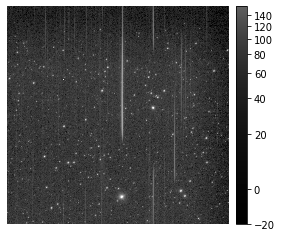

In [9]:
collection = "u/dagoret/first_test"
im = butler.get('postISRCCD', dataId={'exposure': 2021070700317, 'instrument': 'LATISS', 'detector': 0}, collections = collection)

fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(im.image)
plt.gca().axis('off')

In [109]:
collection='LATISS/raw/all'

datasetRefs = registry.queryDatasets(datasetType='raw', collections=collection, 
                                     where= "instrument='LATISS'")

for i, ref in enumerate(datasetRefs):
    print("==================================================================================")
   
    print("fullId: ",ref.dataId.full)
    print("..................................................................................")
    print("band:   ",ref.dataId["band"])
    print("type:   ",ref.datasetType)
    
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(ref.to_simple())
    print(".  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .")
    print(ref.to_json())
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    
    print("run = ",ref.run)
    print("isCalibration: ",ref.datasetType.isCalibration())
    
    print("isComponent:    ",ref.isComponent())
    
    print("isComposite:   ",ref.isComposite()) 
    
    if i> 5:
        break;

fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', exposure: 2021021600208}
..................................................................................
band:    white
type:    DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
id=UUID('4e6df063-6848-51ed-a633-b7891f627872') datasetType=SerializedDatasetType(name='raw', storageClass='Exposure', dimensions=SerializedDimensionGraph(names=['band', 'instrument', 'detector', 'physical_filter', 'exposure']), parentStorageClass=None, isCalibration=False) dataId=SerializedDataCoordinate(dataId={'band': 'white', 'instrument': 'LATISS', 'detector': 0, 'physical_filter': 'empty~empty', 'exposure': 2021021600208}, records=None) run='LATISS/raw/all' component=None
.  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
{"id": "4e6df063-6848-51ed-a633-b7891f627

In [65]:
for dim in ['band','physical_filter','exposure', 'visit','instrument', 'detector']:
    print(list(registry.queryDimensionRecords(dim))[0])
    print()

band:
  name: 'g'

physical_filter:
  instrument: 'LATISS'
  name: 'empty'
  band: 'white'

exposure:
  instrument: 'LATISS'
  id: 2021021600208
  physical_filter: 'empty~empty'
  obs_id: 'AT_O_20210216_000208'
  exposure_time: 2.0
  dark_time: 2.33517265319824
  observation_type: 'science'
  observation_reason: 'science'
  day_obs: 20210216
  seq_num: 208
  group_name: '2021-02-17T03:35:45.035'
  group_id: 1934625450350000
  target_name: 'HD 50896'
  science_program: 'unknown'
  tracking_ra: 103.384001783548
  tracking_dec: -23.9734478006315
  sky_angle: -180.0
  zenith_angle: 24.314073266185005
  timespan: Timespan(begin=astropy.time.Time('2021-02-17 03:35:45.295446', scale='tai', format='iso'), end=astropy.time.Time('2021-02-17 03:35:47.540000', scale='tai', format='iso'))

visit:
  instrument: 'LATISS'
  id: 2021090900521
  physical_filter: 'FELH0600~empty'
  visit_system: 0
  name: 'AT_O_20210909_000521'
  day_obs: 20210909
  exposure_time: 30.0
  target_name: 'caltest57'
  observ

In [96]:
print(list(registry.queryDimensionRecords('exposure'))[0:20])

[exposure.RecordClass(instrument='LATISS', id=2021021600208, physical_filter='empty~empty', obs_id='AT_O_20210216_000208', exposure_time=2.0, dark_time=2.33517265319824, observation_type='science', observation_reason='science', day_obs=20210216, seq_num=208, group_name='2021-02-17T03:35:45.035', group_id=1934625450350000, target_name='HD 50896', science_program='unknown', tracking_ra=103.384001783548, tracking_dec=-23.9734478006315, sky_angle=-180.0, zenith_angle=24.314073266185005, timespan=Timespan(begin=astropy.time.Time('2021-02-17 03:35:45.295446', scale='tai', format='iso'), end=astropy.time.Time('2021-02-17 03:35:47.540000', scale='tai', format='iso'))), exposure.RecordClass(instrument='LATISS', id=2021021600163, physical_filter='RG610~empty', obs_id='AT_O_20210216_000163', exposure_time=3.0, dark_time=3.3251359462738, observation_type='science', observation_reason='science', day_obs=20210216, seq_num=163, group_name='2021-02-17T00:50:15.536', group_id=1934526155360000, target_n

In [103]:
for count, info in enumerate(registry.queryDimensionRecords('exposure')):
    print("--------------------------------",count,"-------------------------------")
    print(info)
    print("type-of-observation: ",info.observation_type)
    if count > 5:
        break;

-------------------------------- 0 -------------------------------
exposure:
  instrument: 'LATISS'
  id: 2021021600208
  physical_filter: 'empty~empty'
  obs_id: 'AT_O_20210216_000208'
  exposure_time: 2.0
  dark_time: 2.33517265319824
  observation_type: 'science'
  observation_reason: 'science'
  day_obs: 20210216
  seq_num: 208
  group_name: '2021-02-17T03:35:45.035'
  group_id: 1934625450350000
  target_name: 'HD 50896'
  science_program: 'unknown'
  tracking_ra: 103.384001783548
  tracking_dec: -23.9734478006315
  sky_angle: -180.0
  zenith_angle: 24.314073266185005
  timespan: Timespan(begin=astropy.time.Time('2021-02-17 03:35:45.295446', scale='tai', format='iso'), end=astropy.time.Time('2021-02-17 03:35:47.540000', scale='tai', format='iso'))
type-of-observation:  science
-------------------------------- 1 -------------------------------
exposure:
  instrument: 'LATISS'
  id: 2021021600163
  physical_filter: 'RG610~empty'
  obs_id: 'AT_O_20210216_000163'
  exposure_time: 3.0
 

In [110]:
datasetRefs = registry.queryDatasets(datasetType='bias',where= "instrument='LATISS'", collections=collection)

In [111]:
for i, ref in enumerate(datasetRefs):
    print("==================================================================================")
   
    print("fullId: ",ref.dataId.full)

In [117]:
for count, info in enumerate(registry.queryDimensionRecords('exposure',where="observation_type = 'bias'")):
    print(info)
    if count>100:
        break;
    

LookupError: No dimension with name 'observation_type'.

In [116]:
datasetRefs = registry.queryDatasets("raw", where="exposure.observation_type = 'bias'",collections=collection)
                                    

RuntimeError: Error in query expression "exposure.observation_type = 'bias'": No value(s) for governor dimensions {instrument} in expression that references dependent dimensions. 'Governor' dimensions must always be specified completely in either the query expression (via simple 'name=<value>' terms, not 'IN' terms) or in a data ID passed to the query method.